# K Means Clustering Hand Coded

In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


    Import and scale data

In [9]:
iris= load_iris()
iris_features_df = pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [11]:
iris_features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_features_df)

# KMeans Algorithm 
    1. Initialize k centroids (clusters)
    2. Assign datapoints to a centroid based on euclidean distance to closest centroid 
    3. Calculte mean of data points assigned to each centroid
    4. Repeat the previous two steps until no assignments are changed

### Initialize k centroids

In [18]:
k = 3 
centroids = [] 
np.random.seed(4)

#generating random centroid
for i in range(k):
    index = np.random.choice(range(iris_scaled.shape[0]))
    centroids.append(iris_scaled[index])
    
centroids

[array([ 2.24968346, -0.58776353,  1.67260991,  1.05353673]),
 array([ 1.64384411, -0.1249576 ,  1.16081857,  0.52764485]),
 array([ 0.79566902, -0.1249576 ,  1.16081857,  1.31648267])]

### Assign datapoints a cluster by euclidean distance closest to centroid

In [22]:
def euclidean_dist(e,t):
    for i in range(len(e)):
        dp=[]
        dp.append((e[i]-t[i])**2)
    return np.sqrt(sum(dp))    

In [25]:
assignments = []

for row in iris_scaled:
    row_label = np.argmin([euclidean_dist(row, centroid) for centroid in centroids])
    assignments.append(row_label)

### Reassign centroids to mean of each cluster 

In [40]:
centroids = [] 
for i in range(k):
    assignment_mask = np.array(assignments) == i
    centroids.append(np.mean(iris_scaled[assignment_mask], axis=0))
centroids

[array([ 0.85416385, -0.28454585,  0.97257348,  0.94926507]),
 array([-0.41950492,  0.03746948, -0.45657328, -0.50896895]),
 array([ 1.10927997,  0.25617669,  1.13405824,  1.49435787])]

### Reassign points

In [42]:
new_assignments= []
for row in iris_scaled:
    row_label = np.argmin([euclidean_dist(row, centroid) for centroid in centroids])
    new_assignments.append(row_label)

### Check if new assignment is same as old assignment

In [44]:
new_assignments == assignments

False

### Repeat process until assignments do not change

In [45]:
iterations = 0 
while assignments != new_assignments:
    assignments = new_assignments.copy()
    centroids = []
    for i in range(k):
        assignment_mask = np.array(assignments) == i 
        centroids.append(np.mean(iris_scaled[assignment_mask], axis=0))
    new_assignments = []
    for row in iris_scaled:
        row_label = np.argmin([euclidean_dist(row, centroid) for centroid in centroids])
        new_assignments.append(row_label)
    iterations +=1
    
iterations

5

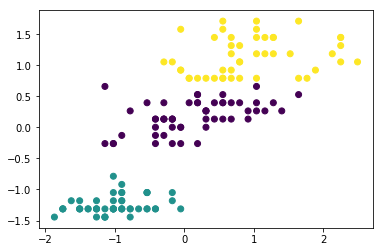

In [64]:
plt.scatter(iris_scaled[:,0], iris_scaled[:,3], c = new_assignments)